# Data Loading & Inspection

In [143]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import f_oneway
from scipy.stats import t
import numpy as np
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Load the dataset and display the first 10 rows. How many columns and rows does it have?

In [184]:


# Load the dataset (replace 'diabetes_data.csv' with your file path)
df = pd.read_csv('Diabetes .csv')

# Display first 10 rows
print("First 10 rows:")
print(df.head(10))

# Get dataset shape (rows, columns)
num_rows, num_columns = df.shape
print(f"\nThe dataset has {num_rows} rows and {num_columns} columns.")

First 10 rows:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
5  634      34224      F   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
6  721      34225      F   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   
7  421      34227      M   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4   
8  670      34229      M   43   2.6  67    4.0   3.8  0.9  2.4  3.7   1.0   
9  759      34230      F   32   3.6  28    4.0   3.8  2.0  2.4  3.8   1.0   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
5  21.0     N  
6  24.0     N  
7  24.0  

# Check for missing values. Which columns have the most missing data, and how would you handle them?

In [145]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Identify columns with the most missing values
max_missing_col = missing_values.idxmax()
print(f"\nColumn with most missing values: '{max_missing_col}' ({missing_values[max_missing_col]} missing)")

# Suggested handling (example: fill with median for numerical columns)
if missing_values[max_missing_col] > 0:
    if df[max_missing_col].dtype in ['int64', 'float64']:
        df[max_missing_col].fillna(df[max_missing_col].median(), inplace=True)
    else:
        df[max_missing_col].fillna(df[max_missing_col].mode()[0], inplace=True)
    print(f"\nFilled missing values in '{max_missing_col}'.")
else:
    print("\nNo missing values to handle.")

Missing values per column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Column with most missing values: 'ID' (0 missing)

No missing values to handle.


# What are the data types of each column? Convert any incorrect types (e.g., No_Pation to string).

In [146]:
# Check current data types
print("Current data types:")
print(df.dtypes)

# Convert 'No_Pation' to string (if it's an identifier, not a numerical value)
if df['No_Pation'].dtype in ['int64', 'float64']:
    df['No_Pation'] = df['No_Pation'].astype(str)
    print("\nConverted 'No_Pation' to string.")

# Verify updated data types
print("\nUpdated data types:")
print(df.dtypes)

Current data types:
ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

Converted 'No_Pation' to string.

Updated data types:
ID             int64
No_Pation     object
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


# Data Cleaning (4 Questions)

# Are there duplicate rows? If yes, remove them and report how many were deleted.

In [186]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates (if any) and keep the first occurrence
if duplicates > 0:
    df_cleaned = df.drop_duplicates(keep='first')
    print(f"{duplicates} duplicate rows were deleted.")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.



# Detect and handle outliers in the Urea column using the IQR method.

In [149]:
# Calculate IQR for Urea
Q1 = df['Urea'].quantile(0.25)
Q3 = df['Urea'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Urea'] < lower_bound) | (df['Urea'] > upper_bound)]
print(f"Number of outliers in Urea: {len(outliers)}")

# Handle outliers (cap them to bounds)
df['Urea'] = df['Urea'].clip(lower_bound, upper_bound)

# Verify
print("Urea after handling outliers:")
print(df['Urea'].describe())

Number of outliers in Urea: 65
Urea after handling outliers:
count    1000.000000
mean        4.826843
std         1.714231
min         0.700000
25%         3.700000
50%         4.600000
75%         5.700000
max         8.700000
Name: Urea, dtype: float64


# The CLASS column should be binary (Y/N). Are there any unexpected values? Clean if needed.

In [150]:
# Check unique values in CLASS
print("Unique values in CLASS before cleaning:")
print(df['CLASS'].unique())

# Clean unexpected values (assuming valid values are 'Y'/'N')
df['CLASS'] = df['CLASS'].str.upper()  # Convert to uppercase
valid_values = ['Y', 'N']
df['CLASS'] = df['CLASS'].apply(lambda x: x if x in valid_values else 'N')  # Default to 'N' for invalid

# Verify
print("\nUnique values in CLASS after cleaning:")
print(df['CLASS'].unique())

Unique values in CLASS before cleaning:
['N' 'N ' 'P' 'Y' 'Y ']

Unique values in CLASS after cleaning:
['N' 'Y']



# Normalize the BMI column to a 0-1 scale using Min-Max normalization.

In [151]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Normalize BMI and add as a new column (optional)
df['BMI_Normalized'] = scaler.fit_transform(df[['BMI']])

# Verify
print("BMI before and after normalization:")
print(df[['BMI', 'BMI_Normalized']].head())

BMI before and after normalization:
    BMI  BMI_Normalized
0  24.0        0.173913
1  23.0        0.139130
2  24.0        0.173913
3  24.0        0.173913
4  21.0        0.069565


# Exploratory Data Analysis (EDA) (8 Questions)




# What is the average age of diabetic vs. non-diabetic patients?

In [188]:
avg_age = df.groupby('CLASS')['AGE'].mean()
print(avg_age)

CLASS
N     44.294118
N     38.000000
P     43.283019
Y     55.386905
Y     38.250000
Name: AGE, dtype: float64


# Compare the mean HbA1c levels between genders (Gender column). Is there a significant difference?

In [189]:


# Group HbA1c by gender
male_hba1c = df[df['Gender'] == 'M']['HbA1c']
female_hba1c = df[df['Gender'] == 'F']['HbA1c']

# Calculate means
print("Mean HbA1c - Male:", male_hba1c.mean(), "Female:", female_hba1c.mean())

# T-test for significance
t_stat, p_value = ttest_ind(male_hba1c, female_hba1c, nan_policy='omit')
print("p-value:", p_value)

Mean HbA1c - Male: 8.260353982300886 Female: 8.295299539170507
p-value: 0.828735227203925


# Plot the distribution of Chol (cholesterol) for each CLASS using a boxplot.

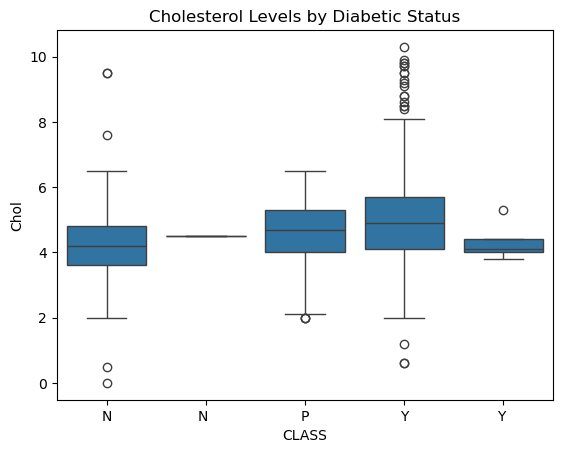

In [190]:
sns.boxplot(x='CLASS', y='Chol', data=df)
plt.title('Cholesterol Levels by Diabetic Status')
plt.show()


# Which age group has the highest average TG (triglycerides)? Use bins (e.g., 20-30, 30-40).


In [156]:
# Bin ages into groups (handling edge cases)
df['Age_Group'] = pd.cut(
    df['AGE'], 
    bins=[20, 30, 40, 50, 60, 70],  # Extended to 70 for future-proofing
    labels=['20-30', '30-40', '40-50', '50-60', '60-70'],
    right=False  # Includes left edge, excludes right (e.g., 20-29.999...)
)
# Calculate mean TG by age group (suppressing the warning)
tg_by_age = df.groupby('Age_Group', observed=True)['TG'].mean().sort_values(ascending=False)
print(tg_by_age)

Age_Group
60-70    2.632710
50-60    2.385431
20-30    2.271429
40-50    1.971963
30-40    1.853086
Name: TG, dtype: float64


# Calculate the correlation matrix. Which 3 features are most correlated with HbA1c?


In [157]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix['HbA1c'].abs().sort_values(ascending=False).head(4))  # Top 3 + HbA1c itself

HbA1c             1.000000
BMI               0.413350
BMI_Normalized    0.413350
AGE               0.379136
Name: HbA1c, dtype: float64


# How many patients have BMI > 25 (overweight) and CLASS = 'Y' (diabetic)?


In [158]:
overweight_diabetic = df[(df['BMI'] > 25) & (df['CLASS'] == 'Y')].shape[0]
print("Count:", overweight_diabetic)

Count: 773


# Use a scatter plot to explore the relationship between LDL and HDL (colored by CLASS)


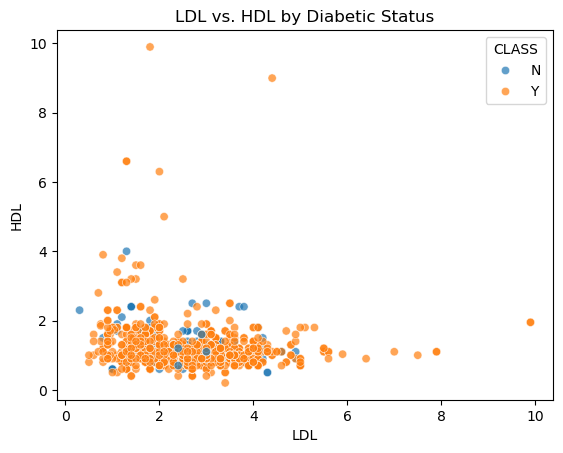

In [159]:
sns.scatterplot(x='LDL', y='HDL', hue='CLASS', data=df, alpha=0.7)
plt.title('LDL vs. HDL by Diabetic Status')
plt.show()

# What percentage of diabetic patients (CLASS = 'Y') have HbA1c > 6.5 (diagnostic threshold)?

In [160]:
diabetics = df[df['CLASS'] == 'Y']
high_hba1c = diabetics[diabetics['HbA1c'] > 6.5].shape[0]
percentage = (high_hba1c / len(diabetics)) * 100
print(f"{percentage:.2f}% of diabetics have HbA1c > 6.5")

87.86% of diabetics have HbA1c > 6.5



# Perform a t-test to check if HbA1c levels differ significantly between diabetic and non-diabetic patients.


In [162]:
# Separate HbA1c values by CLASS
group_N = df[df['CLASS'] == 'N']['HbA1c']
group_Y = df[df['CLASS'] == 'Y']['HbA1c']  # Assuming 'Y' exists in your data

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_N, group_Y, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Null Hypothesis: HbA1c differs significantly between groups.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")

T-statistic: -30.828, P-value: 0.0000
Reject Null Hypothesis: HbA1c differs significantly between groups.



# Calculate the 95% confidence interval for the mean Cr (creatinine) of diabetic patients.


In [163]:
# Filter Cr values for diabetic patients
cr_values = df[df['CLASS'] == 'Y']['Cr'].dropna()
mean_cr = np.mean(cr_values)
std_cr = np.std(cr_values, ddof=1)  # Sample standard deviation
n = len(cr_values)

# Calculate CI
confidence = 0.95
t_critical = t.ppf((1 + confidence) / 2, df=n-1)
margin_of_error = t_critical * (std_cr / np.sqrt(n))
ci_lower, ci_upper = mean_cr - margin_of_error, mean_cr + margin_of_error

print(f"95% CI for Mean Cr: [{ci_lower:.2f}, {ci_upper:.2f}]")

95% CI for Mean Cr: [65.57, 74.20]


# Use ANOVA to test if mean BMI differs across age groups (e.g., 20-30, 30-40, etc.).


In [164]:

# Fit ANOVA model (automatically handles empty groups)
model = ols('BMI ~ C(Age_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df          F        PR(>F)
C(Age_Group)   5728.887319    4.0  75.241155  1.324467e-55
Residual      18521.138379  973.0        NaN           NaN


# Is the distribution of TG (triglycerides) normal? Use a Shapiro-Wilk test.


In [165]:
# Perform Shapiro-Wilk test
tg_values = df['TG'].dropna()
stat, p_value = shapiro(tg_values)

print(f"Shapiro-Wilk Statistic: {stat:.3f}, P-value: {p_value:.4f}")
if p_value > 0.05:
    print("Fail to Reject Null Hypothesis: TG is normally distributed.")
else:
    print("Reject Null Hypothesis: TG is NOT normally distributed.")

Shapiro-Wilk Statistic: 0.830, P-value: 0.0000
Reject Null Hypothesis: TG is NOT normally distributed.



# Compute the chi-square test to check if Gender and CLASS are independent.


In [166]:
# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['CLASS'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Gender and CLASS are dependent.")
else:
    print("Fail to Reject Null Hypothesis: Gender and CLASS are independent.")

Chi2 Statistic: 4.193, P-value: 0.1229
Fail to Reject Null Hypothesis: Gender and CLASS are independent.


# Feature Engineering 
# Create a new column Age_Group (e.g., "20-30", "30-40") from the AGE column.


In [168]:
# Define age bins and labels
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']
# Create Age_Group column
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
# Verify
print(df[['AGE', 'Age_Group']].head())

   AGE Age_Group
0   50     50-59
1   26     20-29
2   50     50-59
3   50     50-59
4   33     30-39


# Bin the HbA1c values into categories: "Normal (<5.7)", "Prediabetic (5.7-6.4)", "Diabetic (≥6.5)".


In [169]:
# Define HbA1c bins and labels
bins = [0, 5.7, 6.4, float('inf')]
labels = ['Normal (<5.7)', 'Prediabetic (5.7-6.4)', 'Diabetic (≥6.5)']
# Create HbA1c_Category column
df['HbA1c_Category'] = pd.cut(df['HbA1c'], bins=bins, labels=labels)
# Check distribution
print(df['HbA1c_Category'].value_counts())

HbA1c_Category
Diabetic (≥6.5)          761
Normal (<5.7)            159
Prediabetic (5.7-6.4)     80
Name: count, dtype: int64


# Calculate the Lipid_Ratio as TG / HDL and add it as a new column.


In [170]:
# Calculate Lipid_Ratio (handle division by zero)
df['Lipid_Ratio'] = df['TG'] / df['HDL'].replace(0, 0.001)  # Avoid division by zero
# Verify
print(df[['TG', 'HDL', 'Lipid_Ratio']].head())

    TG  HDL  Lipid_Ratio
0  0.9  2.4     0.375000
1  1.4  1.1     1.272727
2  0.9  2.4     0.375000
3  0.9  2.4     0.375000
4  1.0  0.8     1.250000


# Use one-hot encoding to convert the Gender column into numerical values.

In [171]:
# One-hot encode Gender (creates 'Gender_F' and 'Gender_M' columns)
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=False)

# Verify
print(df[['Gender_F', 'Gender_M']].head())

   Gender_F  Gender_M
0      True     False
1     False      True
2      True     False
3      True     False
4     False      True


# Advanced Analysis
# Train a logistic regression model to predict CLASS using HbA1c, BMI, and Age. Report accuracy.


In [134]:
# Prepare data: Select features and target
X = df[['HbA1c', 'BMI', 'AGE']]
y = df['CLASS'].map({'N': 0, 'Y': 1})  # Convert to binary

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.94


# Use a decision tree to identify the top 3 most important features for predicting diabetes.


In [135]:

# Train decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Get feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
print(importance.sort_values('Importance', ascending=False).head(3))

  Feature  Importance
1     BMI    0.681314
0   HbA1c    0.256057
2     AGE    0.062629


# Cluster patients into 3 groups using K-means based on HbA1c, BMI, and TG. Interpret the clusters.


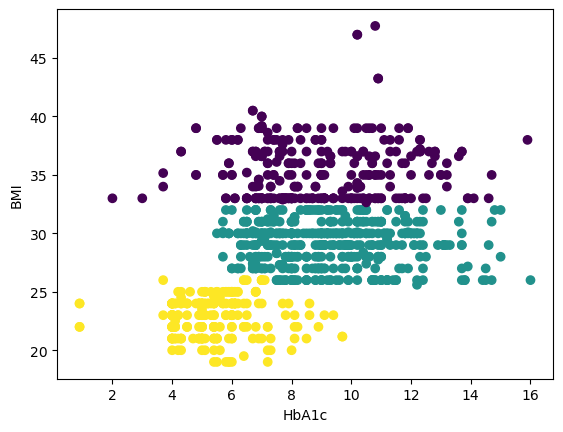

In [136]:
# Select features
X_cluster = df[['HbA1c', 'BMI', 'TG']]

# Cluster into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize
plt.scatter(df['HbA1c'], df['BMI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('HbA1c')
plt.ylabel('BMI')
plt.show()

# Perform PCA to reduce the dimensions of numerical features. How much variance is explained by the first 2 components?


In [137]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include='number'))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance explained
print(f"Variance explained by PC1 and PC2: {pca.explained_variance_ratio_.sum():.2f}")

Variance explained by PC1 and PC2: 0.40


# Build a histogram of HbA1c for diabetic patients only. Is it skewed? If yes, apply a log transformation.


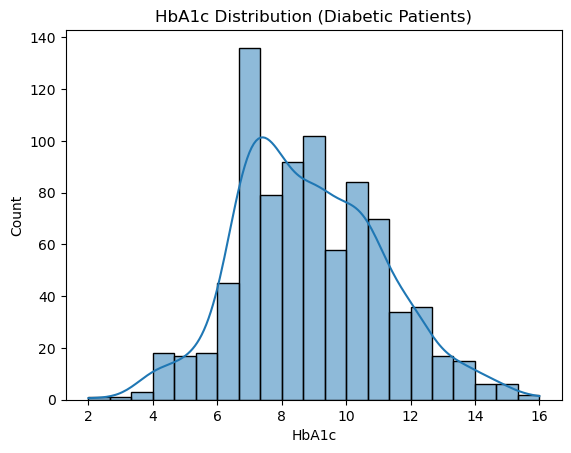

Skewness: 0.28


In [140]:
# Filter diabetic patients
diabetic = df[df['CLASS'] == 'Y']

# Plot histogram
sns.histplot(diabetic['HbA1c'], kde=True)
plt.title('HbA1c Distribution (Diabetic Patients)')
plt.show()

# Check skewness
print(f"Skewness: {diabetic['HbA1c'].skew():.2f}")

# Log transform if skewed
if abs(diabetic['HbA1c'].skew()) > 1:
    diabetic['HbA1c_log'] = np.log(diabetic['HbA1c'])
    sns.histplot(diabetic['HbA1c_log'], kde=True)
    plt.title('Log-Transformed HbA1c')
    plt.show()

# Use Seaborn’s pairplot to visualize relationships between HbA1c, BMI, Age, and CLASS.

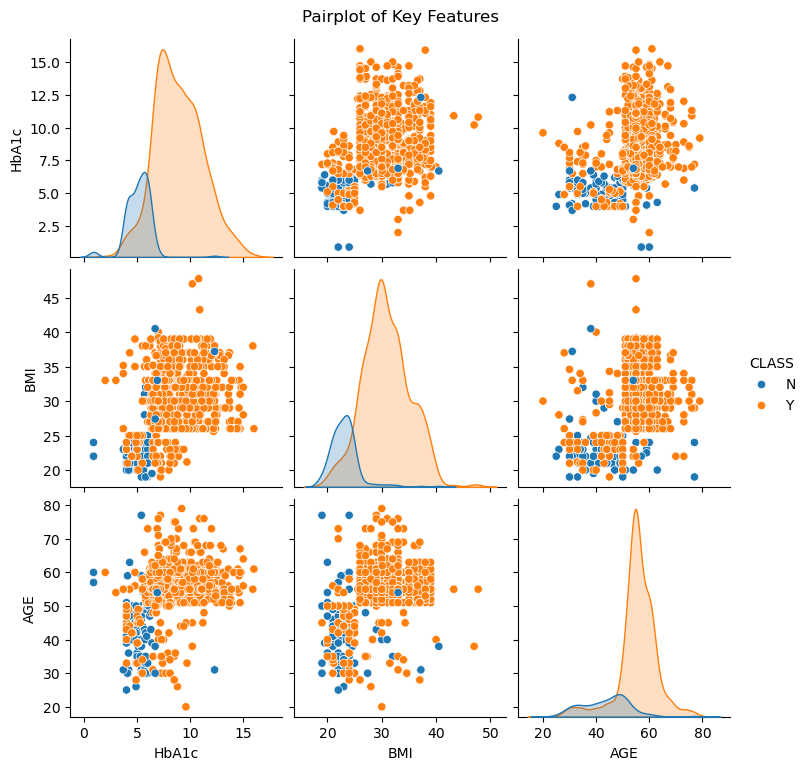

In [141]:
sns.pairplot(df, vars=['HbA1c', 'BMI', 'AGE'], hue='CLASS', diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

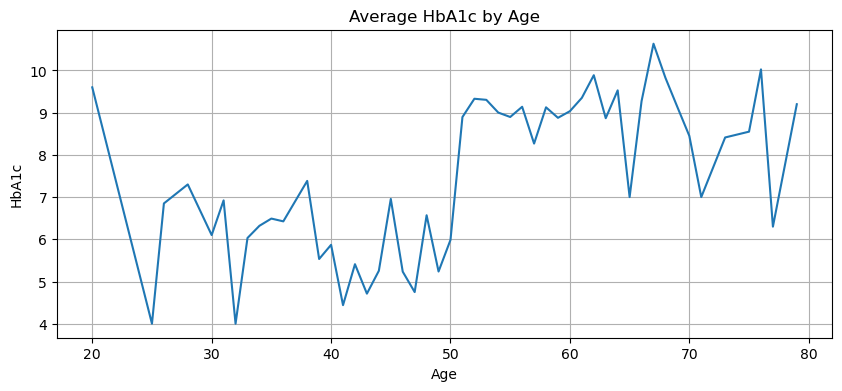

In [177]:
# Group by age and plot HbA1c trends
age_trend = df.groupby('AGE')['HbA1c'].mean()

plt.figure(figsize=(10, 4))
age_trend.plot(title='Average HbA1c by Age')
plt.xlabel('Age')
plt.ylabel('HbA1c')
plt.grid(True)
plt.show()

In [178]:
# Split data into diabetic (Y) vs non-diabetic (N)
vldl_diabetic = df[df['CLASS'] == 'Y']['VLDL']
vldl_non_diabetic = df[df['CLASS'] == 'N']['VLDL']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(vldl_diabetic, vldl_non_diabetic, alternative='greater')

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Diabetics have significantly higher VLDL levels.")
else:
    print("Fail to reject H₀: No significant difference in VLDL levels.")

T-statistic: 2.68, P-value: 0.0038
Reject H₀: Diabetics have significantly higher VLDL levels.
